# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [1]:
import pandas as pd

## imports for Python, Pandas

In [2]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [3]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [4]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [5]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,state,shortname,info.governor
0,Dade,12345,Florida,FL,Rick Scott
1,Broward,40000,Florida,FL,Rick Scott
2,Palm Beach,60000,Florida,FL,Rick Scott
3,Summit,1234,Ohio,OH,John Kasich
4,Cuyahoga,1337,Ohio,OH,John Kasich


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [6]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{'_id': {'$oid': '52b213b38594d8a2be17c780'},
  'approvalfy': 1999,
  'board_approval_month': 'November',
  'boardapprovaldate': '2013-11-12T00:00:00Z',
  'borrower': 'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  'closingdate': '2018-07-07T00:00:00Z',
  'country_namecode': 'Federal Democratic Republic of Ethiopia!$!ET',
  'countrycode': 'ET',
  'countryname': 'Federal Democratic Republic of Ethiopia',
  'countryshortname': 'Ethiopia',
  'docty': 'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  'envassesmentcategorycode': 'C',
  'grantamt': 0,
  'ibrdcommamt': 0,
  'id': 'P129828',
  'idacommamt': 130000000,
  'impagency': 'MINISTRY OF EDUCATION',
  'lendinginstr': 'Investment Project Financing',
  'lendinginstrtype': 'IN',
  'lendprojectcost': 550000000,
  'majorsector_percent': [{'Name': 'Education', 'Percent': 46},
   {'Name': 'Education', 'Percent': 26},
   {'Name': 'Public Administration, Law, and Justice', 'Percent': 16},
   {'Name': 'Educatio

In [7]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Name': 'Education for all', 'Percent': 100}","[{'name': 'Education for all', 'code': '65'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Name': 'Other economic management', 'Percent...","[{'name': 'Other economic management', 'code':...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

[My solutions to the exercise are in the cells below]

First, import all necessary libraries.

In [8]:
import pandas as pd
import json
from pandas.io.json import json_normalize
import re as re
%matplotlib inline

Read the data from file 'data/world_bank_projects.json' into a DataFrame.

In [9]:
json_df = pd.read_json('data/world_bank_projects.json', 
                              encoding='utf-8')

json_df.head(2)

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Percent': 100, 'Name': 'Education for all'}","[{'code': '65', 'name': 'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Percent': 30, 'Name': 'Other economic manage...","[{'code': '24', 'name': 'Other economic manage...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


### Problem 1: Find the 10 countries with most projects

Below, 'cwmp' stands for "countries with most projects."

In [10]:
cwmp = json_df.countryshortname.value_counts().sort_values(ascending=False).head(10)

cwmp

Indonesia             19
China                 19
Vietnam               17
India                 16
Yemen, Republic of    13
Morocco               12
Bangladesh            12
Nepal                 12
Africa                11
Mozambique            11
Name: countryshortname, dtype: int64

We notice two things about the 'cwmp' series:

1. Africa appears to rank 10th amoung the 10 countries with most projects; However, Africa isn't a country. We will need to deal with this.  
2. 'Yemen, Republic of ' doesn't look very nice.  We'll want to relabel 'Yemen, Republic of' simply as "Yemen'.

We want to figure out why Africa (which is not a country) appears to rank 10th amoung the 10 countries with most projects.

What are the columns in our 'json_df' DataFrame, and which of those columns might help us figure out our question regarding Africa?

In [11]:
json_df.columns.tolist()

['_id',
 'approvalfy',
 'board_approval_month',
 'boardapprovaldate',
 'borrower',
 'closingdate',
 'country_namecode',
 'countrycode',
 'countryname',
 'countryshortname',
 'docty',
 'envassesmentcategorycode',
 'grantamt',
 'ibrdcommamt',
 'id',
 'idacommamt',
 'impagency',
 'lendinginstr',
 'lendinginstrtype',
 'lendprojectcost',
 'majorsector_percent',
 'mjsector_namecode',
 'mjtheme',
 'mjtheme_namecode',
 'mjthemecode',
 'prodline',
 'prodlinetext',
 'productlinetype',
 'project_abstract',
 'project_name',
 'projectdocs',
 'projectfinancialtype',
 'projectstatusdisplay',
 'regionname',
 'sector',
 'sector1',
 'sector2',
 'sector3',
 'sector4',
 'sector_namecode',
 'sectorcode',
 'source',
 'status',
 'supplementprojectflg',
 'theme1',
 'theme_namecode',
 'themecode',
 'totalamt',
 'totalcommamt',
 'url']

It looks as though the following columns might be informative:

In [12]:
column_filter = ['_id',
                 'borrower', 
                 'country_namecode',
                 'countrycode',
                 'countryname',
                 'countryshortname',
                 'id',
                 'impagency',
                 'lendinginstr',
                 'lendinginstrtype',
                 'project_abstract',
                 'project_name',
                 'projectdocs',
                 'regionname',
                 'url']

In [13]:
json_df_Africa = json_df.copy()
json_df_Africa = json_df_Africa.filter(column_filter)
json_df_Africa = json_df_Africa[json_df_Africa.countryshortname == 'Africa']
json_df_Africa

,_id,borrower,country_namecode,countrycode,countryname,countryshortname,id,impagency,lendinginstr,lendinginstrtype,project_abstract,project_name,projectdocs,regionname,url
45,{'$oid': '52b213b38594d8a2be17c7ad'},ECOWAS,Africa!$!3A,3A,Africa,Africa,P125018,WAHO,Investment Project Financing,IN,NaN,West Africa Regional Disease Surveillance Cap...,"[{'DocDate': '28-MAR-2013', 'EntityID': '09022...",Africa,http://www.worldbank.org/projects/P125018/west...
46,{'$oid': '52b213b38594d8a2be17c7ae'},UGANDA-COMOROS,Africa!$!3A,3A,Africa,Africa,P118213,RELEVANT MINISTRIES IN CHARGE OF TELECOM/ICT P...,Adaptable Program Loan,IN,{'cdata': 'The development objectives of Fourt...,RCIP4 - Regional Communications Infrastructure...,"[{'DocDate': '24-SEP-2013', 'EntityID': '09022...",Africa,http://www.worldbank.org/projects/P118213/rcip...
51,{'$oid': '52b213b38594d8a2be17c7b3'},"OSS, IUCN, CILSS",Africa!$!3A,3A,Africa,Africa,P130888,"OSS, IUCN, CILSS/AGRYHMET",Specific Investment Loan,IN,{'cdata': 'The objective of the Building Resil...,"Building Resilience through Innovation, Commun...","[{'DocDate': '09-AUG-2013', 'EntityID': '00033...",Africa,http://www.worldbank.org/projects/P130888/buil...
58,{'$oid': '52b213b38594d8a2be17c7ba'},BANK EXECUTED,Africa!$!3A,3A,Africa,Africa,P144902,BANK EXECUTED,Specific Investment Loan,IN,NaN,Fighting against wildlife poaching and illegal...,NaN,Africa,http://www.worldbank.org/projects/P144902?lang=en
65,{'$oid': '52b213b38594d8a2be17c7c1'},"BURUNDI,RWANDA,TANZANIA",Africa!$!3A,3A,Africa,Africa,P075941,NaN,Specific Investment Loan,IN,{'cdata': 'The objective of the Regional Rusum...,Regional Rusumo Falls Hydroelectric Project,"[{'DocDate': '15-JUL-2013', 'EntityID': '09022...",Africa,http://www.worldbank.org/projects/P075941/nels...
99,{'$oid': '52b213b38594d8a2be17c7e3'},GOVERNMENT OF MALI,Africa!$!3A,3A,Africa,Africa,P145160,NaN,Adaptable Program Loan,IN,{'cdata': 'The objective of the Additional Fin...,Additional Financing-West Africa Agricultural ...,"[{'DocDate': '05-JUN-2013', 'EntityID': '00044...",Africa,http://www.worldbank.org/projects/P145160/addi...
167,{'$oid': '52b213b38594d8a2be17c827'},MINISTRIES OF TELECOM AND ICT,Africa!$!3A,3A,Africa,Africa,P123093,NaN,Adaptable Program Loan,IN,{'cdata': 'The overall objective of the Second...,West Africa Regional Communications Infrastruc...,"[{'DocDate': '19-OCT-2013', 'EntityID': '09022...",Africa,http://www.worldbank.org/projects/P123093/west...
184,{'$oid': '52b213b38594d8a2be17c838'},TANZANIA,Africa!$!3A,3A,Africa,Africa,P120370,TANROADS,Adaptable Program Loan,IN,{'cdata': 'The objective of the Southern Afric...,Southern Africa Trade and Transport Facilitati...,"[{'DocDate': '13-OCT-2013', 'EntityID': '09022...",Africa,http://www.worldbank.org/projects/P120370/sout...
287,{'$oid': '52b213b38594d8a2be17c89f'},"MALAWI, MOZAMBIQUE, ZAMBIA",Africa!$!3A,3A,Africa,Africa,P094183,CCARDESA AND NATIONAL GOVERNMENTS/AGENCIES,Specific Investment Loan,IN,{'cdata': 'The objectives of the Agricultural ...,Agricultural Productivity Program for Southern...,"[{'DocDate': '30-SEP-2013', 'EntityID': '09022...",Africa,http://www.worldbank.org/projects/P094183/agri...
353,{'$oid': '52b213b38594d8a2be17c8e1'},NILE BASIN INITIATIVE,Africa!$!3A,3A,Africa,Africa,P130694,NILE BASIN INITIATIVE,Technical Assistance Loan,IN,{'cdata': 'The development objective of the Ni...,Nile Cooperation for Results Project,"[{'DocDate': '03-SEP-2013', 'EntityID': '09022...",Africa,http://www.worldbank.org/projects/P130694/nile...


We can see that some of these borrowers are supranational African organizations (e.g., Economic Community of West African States or 'ECOWAS'), groups of national governments (e.g., 'MALAWI, MOZAMBIQUE, & ZAMBIA'), or national governments (e.g., the 'GOVERNMENT OF NIGER').

Therefore, it appears that the 'countryshortname' for some of these projects has been misclassified.  For instance, the loan to the 'GOVERNMENT OF NIGER' should have 'Niger' as the value for 'countryshortname' and not 'Africa'

Next we want to check for 'countryshortname' values that are not names of countries (e.g., Africa).  We'll then need to reclassify the 'countryshortname' for projects that have been misclassified.

First, we get a unique list of values in the 'countryshortname' field.

In [14]:
json_df.countryshortname.value_counts().sort_values(ascending=False).index.tolist()

['Indonesia',
 'China',
 'Vietnam',
 'India',
 'Yemen, Republic of',
 'Morocco',
 'Bangladesh',
 'Nepal',
 'Africa',
 'Mozambique',
 'Burkina Faso',
 'Brazil',
 'Pakistan',
 'Armenia',
 'Tajikistan',
 'Tanzania',
 'Jordan',
 'Kyrgyz Republic',
 "Lao People's Democratic Republic",
 'Nigeria',
 'Afghanistan',
 'Kenya',
 'West Bank and Gaza',
 'Congo, Democratic Republic of',
 'Nicaragua',
 'Peru',
 'Uzbekistan',
 'Niger',
 'Liberia',
 'Moldova',
 'Haiti',
 'Honduras',
 'Papua New Guinea',
 'Ukraine',
 'Middle East and North Africa',
 'Azerbaijan',
 'Burundi',
 'Pacific Islands',
 'Zambia',
 'Croatia',
 'Senegal',
 "Cote d'Ivoire",
 'Tunisia',
 'Turkey',
 'Ghana',
 'Uganda',
 'Samoa',
 'Benin',
 'Sudan',
 'Bhutan',
 'Albania',
 'Russian Federation',
 'Ethiopia',
 'Mali',
 'Guinea',
 'Georgia',
 'Comoros',
 'Rwanda',
 'Lesotho',
 'Colombia',
 'Macedonia, former Yugoslav Republic of',
 'Madagascar',
 'Vanuatu',
 'Lebanon',
 'Philippines',
 'Djibouti',
 'Maldives',
 'Solomon Islands',
 'Sout

Then, we identify values in this list that are not names of countries (e.g., 'Africa' or 'World')

In [15]:
json_df.countryshortname.value_counts().sort_values(ascending=False).index.tolist()

['Indonesia',
 'China',
 'Vietnam',
 'India',
 'Yemen, Republic of',
 'Morocco',
 'Bangladesh',
 'Nepal',
 'Africa',
 'Mozambique',
 'Burkina Faso',
 'Brazil',
 'Pakistan',
 'Armenia',
 'Tajikistan',
 'Tanzania',
 'Jordan',
 'Kyrgyz Republic',
 "Lao People's Democratic Republic",
 'Nigeria',
 'Afghanistan',
 'Kenya',
 'West Bank and Gaza',
 'Congo, Democratic Republic of',
 'Nicaragua',
 'Peru',
 'Uzbekistan',
 'Niger',
 'Liberia',
 'Moldova',
 'Haiti',
 'Honduras',
 'Papua New Guinea',
 'Ukraine',
 'Middle East and North Africa',
 'Azerbaijan',
 'Burundi',
 'Pacific Islands',
 'Zambia',
 'Croatia',
 'Senegal',
 "Cote d'Ivoire",
 'Tunisia',
 'Turkey',
 'Ghana',
 'Uganda',
 'Samoa',
 'Benin',
 'Sudan',
 'Bhutan',
 'Albania',
 'Russian Federation',
 'Ethiopia',
 'Mali',
 'Guinea',
 'Georgia',
 'Comoros',
 'Rwanda',
 'Lesotho',
 'Colombia',
 'Macedonia, former Yugoslav Republic of',
 'Madagascar',
 'Vanuatu',
 'Lebanon',
 'Philippines',
 'Djibouti',
 'Maldives',
 'Solomon Islands',
 'Sout

In [16]:
# 'noncountry_csn_list' stands for "noncountry country short namelist."

noncountry_csn_list = ['Africa',
                       'Pacific Islands',
                       'Middle East and North Africa',
                       'World',
                       'South Asia',
                       'Europe and Central Asia',
                       'East Asia and Pacific']

In [17]:
json_df[json_df.countryshortname.isin(noncountry_csn_list)]

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
25,{'$oid': '52b213b38594d8a2be17c799'},2014,September,2013-09-30T00:00:00Z,UNIVERSITY OF QUEENSLAND,NaN,East Asia and Pacific!$!4E,4E,East Asia and Pacific,East Asia and Pacific,...,"AB,AZ",IBRD,Active,N,"{'Percent': 40, 'Name': 'Other environment and...","[{'code': '86', 'name': 'Other environment and...","80,81,86",0,4500000,http://www.worldbank.org/projects/P123933/capt...
27,{'$oid': '52b213b38594d8a2be17c79b'},2014,September,2013-09-30T00:00:00Z,PACIFIC AVIATION SECURITY OFFICE,2018-12-31T00:00:00Z,Pacific Islands!$!4P,4P,Pacific Islands,Pacific Islands,...,"BV,TV",IBRD,Active,N,"{'Percent': 5, 'Name': 'Climate change'}","[{'code': '81', 'name': 'Climate change'}, {'c...","52,47,25,81",2150000,2150000,http://www.worldbank.org/projects/P145057/paci...
45,{'$oid': '52b213b38594d8a2be17c7ad'},2014,September,2013-09-12T00:00:00Z,ECOWAS,NaN,Africa!$!3A,3A,Africa,Africa,...,JA,IBRD,Active,N,"{'Percent': 100, 'Name': 'Health system perfor...","[{'code': '67', 'name': 'Health system perform...",67,0,10000000,http://www.worldbank.org/projects/P125018/west...
46,{'$oid': '52b213b38594d8a2be17c7ae'},2014,September,2013-09-10T00:00:00Z,UGANDA-COMOROS,2018-06-30T00:00:00Z,Africa!$!3A,3A,Africa,Africa,...,"BM,CA,CT",IBRD,Active,N,"{'Percent': 20, 'Name': 'Administrative and ci...","[{'code': '25', 'name': 'Administrative and ci...","39,40,78,25",22000000,22000000,http://www.worldbank.org/projects/P118213/rcip...
51,{'$oid': '52b213b38594d8a2be17c7b3'},2014,September,2013-09-04T00:00:00Z,"OSS, IUCN, CILSS",NaN,Africa!$!3A,3A,Africa,Africa,...,"AI,AB,AZ,WZ",IBRD,Active,N,"{'Percent': 20, 'Name': 'Biodiversity'}","[{'code': '80', 'name': 'Biodiversity'}, {'cod...","85,82,81,83,80",0,4630000,http://www.worldbank.org/projects/P130888/buil...
52,{'$oid': '52b213b38594d8a2be17c7b4'},2014,September,2013-09-02T00:00:00Z,SECRETARIAT OF THE PACIFIC COMMUNITY,NaN,Pacific Islands!$!4P,4P,Pacific Islands,Pacific Islands,...,WD,IBRD,Active,N,"{'Percent': 30, 'Name': 'Climate change'}","[{'code': '81', 'name': 'Climate change'}, {'c...","86,81",0,1170000,http://www.worldbank.org/projects/P132449?lang=en
55,{'$oid': '52b213b38594d8a2be17c7b7'},2014,August,2013-08-29T00:00:00Z,"DJIBOUTI,EGYPT,JORDAN,SUDAN,YEMEN",NaN,World!$!1W,1W,World,World,...,"BL,AZ",IBRD,Active,N,"{'Percent': 25, 'Name': 'Water resource manage...","[{'code': '85', 'name': 'Water resource manage...","80,82,86,57,85",0,3000000,http://www.worldbank.org/projects/P113794/red-...
56,{'$oid': '52b213b38594d8a2be17c7b8'},2014,August,2013-08-29T00:00:00Z,DEPARTMENT OF FINANCE,NaN,Pacific Islands!$!4P,4P,Pacific Islands,Pacific Islands,...,CT,IBRD,Active,N,"{'Percent': 70, 'Name': 'Regulation and compet...","[{'code': '40', 'name': 'Regulation and compet...","43,40",0,500000,http://www.worldbank.org/projects/P132686?lang=en
58,{'$oid': '52b213b38594d8a2be17c7ba'},2014,August,2013-08-28T00:00:00Z,BANK EXECUTED,NaN,Africa!$!3A,3A,Africa,Africa,...,"AT,AZ",IBRD,Active,N,"{'Percent': 50, 'Name': 'Biodiversity'}","[{'code': '80', 'name': 'Biodiversity'}, {'cod...","82,80",0,2000000,http://www.worldbank.org/projects/P144902?lang=en
65,{'$oid': '52b213b38594d8a2be17c7c1'},2014,August,2013-08-06T00:00:00Z,"BURUNDI,RWANDA,TANZANIA",2020-12-31T00:00:00Z,Africa!$!3A,3A,Africa,Africa,...,LH,IBRD,Active,N,"{'Percent': 15, 'Name': 'Infrastructure servic...","[{'code': '39', 'name': 'Infrastructure servic...","47,79,62,39",339900000,339900000,http://www.worldbank.org/projects/P075941/nels...


We look through the filtered DataFrame shown above and identify projects where the 'borrower' is a national government.

In [18]:
json_df[json_df.countryshortname.isin(noncountry_csn_list)].filter(['id', 
                                                                    'borrower', 
                                                                    'countryshortname'])

,id,borrower,countryshortname
25,P123933,UNIVERSITY OF QUEENSLAND,East Asia and Pacific
27,P145057,PACIFIC AVIATION SECURITY OFFICE,Pacific Islands
45,P125018,ECOWAS,Africa
46,P118213,UGANDA-COMOROS,Africa
51,P130888,"OSS, IUCN, CILSS",Africa
52,P132449,SECRETARIAT OF THE PACIFIC COMMUNITY,Pacific Islands
55,P113794,"DJIBOUTI,EGYPT,JORDAN,SUDAN,YEMEN",World
56,P132686,DEPARTMENT OF FINANCE,Pacific Islands
58,P144902,BANK EXECUTED,Africa
65,P075941,"BURUNDI,RWANDA,TANZANIA",Africa


The following projects have been misclassified (listing 'id', 'borrower', & 'countryshortname'):

            id 	        borrower 	          countryshortname

    98 	 P144335 	GOVERNMENT OF NEPAL 	  South Asia
    99      P145160 	GOVERNMENT OF MALI 	      Africa
    184 	P120370 	TANZANIA 	              Africa
    322 	P132268 	PALESTINIAN AUTHORITY 	  Middle East and North Africa
    449 	P130174 	GOVERNMENT OF NIGER 	  Africa

Next, we will copy the json_df DataFrame and create a 'new_countryshortname' column.  The 'new_countryshortname' column will contain the corrected countryshortname for projects that have been misclassified, and it will contain the original countryshortname in all other cases.

In [19]:
json_df_reclassified = json_df.copy()
json_df_reclassified['new_countryshortname'] = None

Create a dictionary where the keys are the 'ids' of misclassified projects and the values are the corrected 'countryshortname' values.

In [20]:
reclassify_dict = {'P144335' : 'Nepal', 
                   'P145160' : 'Mali', 
                   'P120370' : 'Tanzania', 
                   'P132268' : 'West Bank and Gaza', 
                   'P130174' : 'Niger'}

We use this dictionary to create a function that takes the 'json_df_reclassified' DataFrame as an argument and returns a series such that:

1. If the project 'id' is among the keys in our 'reclassify_dict' dictionary, return the corresponding dictionary value;
2. Otherwise, return the 'countryshortname' values.

In [21]:
def my_function(df):
    
    if df['id'] in reclassify_dict.keys():
        output = reclassify_dict.get(df['id']) 
    else:
        output = df['countryshortname']
    
    return output

We apply this function to the 'json_df_reclassified' DataFrame and assign the series returned by the function to the 'new_countryshortname' column.

The "axis=1" argument in the "apply" function passes a Series object, row-wise.

In [22]:
json_df_reclassified['new_countryshortname'] = json_df_reclassified.apply(my_function, axis=1)

We check that the reclassification worked as expected.

In [23]:
json_df_reclassified[json_df_reclassified.id.isin(reclassify_dict.keys())].filter(['id', 
                                                                    'borrower', 
                                                                    'countryshortname', 
                                                                    'new_countryshortname'])

,id,borrower,countryshortname,new_countryshortname
98,P144335,GOVERNMENT OF NEPAL,South Asia,Nepal
99,P145160,GOVERNMENT OF MALI,Africa,Mali
184,P120370,TANZANIA,Africa,Tanzania
322,P132268,PALESTINIAN AUTHORITY,Middle East and North Africa,West Bank and Gaza
449,P130174,GOVERNMENT OF NIGER,Africa,Niger


It worked!

Now that we have reclassified the country names, we try again to find the 10 countries with most projects.

As before, 'cwmp' stands for "countries with most projects."

In [24]:
cwmp_new = json_df_reclassified.new_countryshortname.value_counts()
cwmp_new = cwmp_new.sort_values(ascending=False).head(10)
cwmp_new

China                 19
Indonesia             19
Vietnam               17
India                 16
Yemen, Republic of    13
Nepal                 13
Bangladesh            12
Morocco               12
Mozambique            11
Pakistan               9
Name: new_countryshortname, dtype: int64

Finally, we have a list of the 10 countries with most projects!

However, as we mentioned above, 'Yemen, Republic of ' doesn't look very nice. We want to relabel 'Yemen, Republic of' simply as "Yemen'.

In [25]:
cwmp_new.rename(lambda x: re.sub(string=x, pattern=',.*', repl=''), inplace=True)
cwmp_new

China         19
Indonesia     19
Vietnam       17
India         16
Yemen         13
Nepal         13
Bangladesh    12
Morocco       12
Mozambique    11
Pakistan       9
Name: new_countryshortname, dtype: int64

Voila!

Now let's format this into a better-looking DataFrame.

In [26]:
# Transform the Series into a DataFrame:
cwmp_df = cwmp_new.reset_index(drop=False)

# Set the index to start at 1:
cwmp_df.index = cwmp_df.index + 1

# Rename the columns:
new_column_names = {'index': 'Country', 'new_countryshortname': 'Number of Projects'}
cwmp_df.rename(columns=new_column_names, inplace=True)

cwmp_df

,Country,Number of Projects
1,China,19
2,Indonesia,19
3,Vietnam,17
4,India,16
5,Yemen,13
6,Nepal,13
7,Bangladesh,12
8,Morocco,12
9,Mozambique,11
10,Pakistan,9


We can also plot our results:

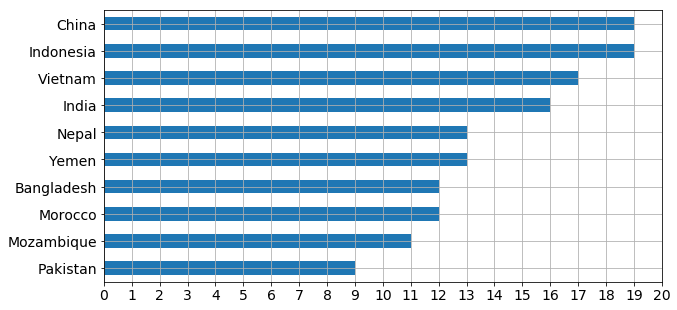

In [27]:
cwmp_new.sort_index(ascending=False).sort_values(ascending=True).plot(kind='barh', 
                                                                      figsize=(10,5), 
                                                                      fontsize=14,
                                                                      xticks=list(range(21)), 
                                                                      grid=True,
                                                                      rot=0)

# THE PROBLEM REPEATED

****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

### Problem 2: Find the top 10 major project themes (using column 'mjtheme_namecode')

First, we'll check and see what the first few values of *mjtheme_namecode* look like:

In [28]:
for i in range(3):
    print('Row ', i, ': ', json_df.mjtheme_namecode[i], '\n')

Row  0 :  [{'code': '8', 'name': 'Human development'}, {'code': '11', 'name': ''}] 

Row  1 :  [{'code': '1', 'name': 'Economic management'}, {'code': '6', 'name': 'Social protection and risk management'}] 

Row  2 :  [{'code': '5', 'name': 'Trade and integration'}, {'code': '2', 'name': 'Public sector governance'}, {'code': '11', 'name': 'Environment and natural resources management'}, {'code': '6', 'name': 'Social protection and risk management'}] 



Since the values of *mjtheme_namecode* are json strings, we can normalize these json values into DataFrames by using the *json_normalize* function, like so:

In [29]:
json_normalize(json_df.mjtheme_namecode[0])

,code,name
0,8,Human development
1,11,


Next, we will create a new DataFrame containing the normalized contents of each *mjtheme_namecode* value.

Additionally, we want to keep track of which project each of these normalized mjtheme_namecode values came from, so we will add a 'project_index' column to track this.

Below, we will create this new DataFrame containing the normalized contents of every *mjtheme_namecode* value.

In [30]:
mjtheme_namecode_df = pd.DataFrame() #create a new (empty) dataframe

for i in range(len(json_df)):
    temp_df = json_normalize(json_df.mjtheme_namecode[i])
    temp_df['project_index'] = i
    mjtheme_namecode_df = mjtheme_namecode_df.append(temp_df, ignore_index=True)

mjtheme_namecode_df.head(10)

,code,name,project_index
0,8,Human development,0
1,11,,0
2,1,Economic management,1
3,6,Social protection and risk management,1
4,5,Trade and integration,2
5,2,Public sector governance,2
6,11,Environment and natural resources management,2
7,6,Social protection and risk management,2
8,7,Social dev/gender/inclusion,3
9,7,Social dev/gender/inclusion,3


As we can see above, many individual projects have more than one major project theme.  For instance, the project with project_index 2 has four major themes:

1. Trade and integration;
2. Public sector governance;
3. Environment and natural resources management; and
4. Social protection and risk management.

Therefore, if we want to find the top 10 major project themes, we can't naively count the frequency of each major theme code.  We need to weigh the frequencies.  Take the previous example.  Since the project with project_index 2 has four major themes, we would give each theme for that project a weight of 1/4. 

So, to create a weighting scheme, we first count the number of major themes for each project.  We do this below by creating a dictionary where the keys are the project_index and the values are the number of major themes.

In [31]:
count_dict = mjtheme_namecode_df.project_index.value_counts().to_dict()
count_dict

{0: 2,
 1: 2,
 2: 4,
 3: 2,
 4: 2,
 5: 2,
 6: 2,
 7: 2,
 8: 2,
 9: 3,
 10: 2,
 11: 4,
 12: 1,
 13: 3,
 14: 3,
 15: 3,
 16: 2,
 17: 2,
 18: 5,
 19: 3,
 20: 2,
 21: 2,
 22: 2,
 23: 2,
 24: 4,
 25: 3,
 26: 4,
 27: 4,
 28: 3,
 29: 2,
 30: 2,
 31: 4,
 32: 2,
 33: 3,
 34: 4,
 35: 3,
 36: 2,
 37: 2,
 38: 5,
 39: 2,
 40: 4,
 41: 2,
 42: 2,
 43: 2,
 44: 2,
 45: 2,
 46: 4,
 47: 2,
 48: 2,
 49: 3,
 50: 2,
 51: 5,
 52: 2,
 53: 4,
 54: 3,
 55: 5,
 56: 2,
 57: 4,
 58: 2,
 59: 2,
 60: 2,
 61: 4,
 62: 2,
 63: 2,
 64: 5,
 65: 4,
 66: 2,
 67: 1,
 68: 2,
 69: 2,
 70: 3,
 71: 3,
 72: 2,
 73: 2,
 74: 2,
 75: 5,
 76: 2,
 77: 2,
 78: 2,
 79: 3,
 80: 2,
 81: 3,
 82: 2,
 83: 2,
 84: 4,
 85: 2,
 86: 2,
 87: 1,
 88: 2,
 89: 3,
 90: 2,
 91: 2,
 92: 2,
 93: 4,
 94: 2,
 95: 3,
 96: 4,
 97: 5,
 98: 3,
 99: 4,
 100: 4,
 101: 2,
 102: 1,
 103: 1,
 104: 5,
 105: 2,
 106: 2,
 107: 4,
 108: 5,
 109: 2,
 110: 4,
 111: 5,
 112: 5,
 113: 4,
 114: 2,
 115: 3,
 116: 2,
 117: 2,
 118: 4,
 119: 2,
 120: 2,
 121: 1,
 122: 3,
 12

Next, we use this dictionary to create a 'weights' column.

In [32]:
mjtheme_namecode_df['weights'] = mjtheme_namecode_df.project_index.replace(count_dict)
mjtheme_namecode_df.weights = (1 / mjtheme_namecode_df.weights)
mjtheme_namecode_df.head(10)

,code,name,project_index,weights
0,8,Human development,0,0.50
1,11,,0,0.50
2,1,Economic management,1,0.50
3,6,Social protection and risk management,1,0.50
4,5,Trade and integration,2,0.25
5,2,Public sector governance,2,0.25
6,11,Environment and natural resources management,2,0.25
7,6,Social protection and risk management,2,0.25
8,7,Social dev/gender/inclusion,3,0.50
9,7,Social dev/gender/inclusion,3,0.50


We notice that not all major theme codes (in the 'code' column) pair with a unique major theme name (in the 'name' column). For instance, in row 1, code 11 is paired with no name, while in row 6, code 11 is paired with the name 'Environment and natural resources management'.

Therefore, we want to figure out what names are paired with each code.

For this, we only need to consider the 'code' and 'name columns in the mjtheme_namecode_df DataFrame.

In [33]:
temp_df = mjtheme_namecode_df.filter(['code','name'], axis=1)
temp_df.head()

,code,name
0,8,Human development
1,11,
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration


We can check if removing duplicate code-name pairs can shrink the amount of data we have to deal with.

In [34]:
len(temp_df)

1499

In [35]:
len(temp_df.drop_duplicates())

22

In [36]:
temp_df.drop_duplicates().sort_values('code')

,code,name
2,1,Economic management
212,1,
121,10,
18,10,Rural development
1,11,
6,11,Environment and natural resources management
5,2,Public sector governance
24,2,
493,3,
252,3,Rule of law


We see that, if we disregard names that are blank, each code can be paired with a unique name.

In [37]:
temp_df = temp_df.drop_duplicates().sort_values('code')
temp_df = temp_df[temp_df.name != '']
temp_df

,code,name
2,1,Economic management
18,10,Rural development
6,11,Environment and natural resources management
5,2,Public sector governance
252,3,Rule of law
11,4,Financial and private sector development
4,5,Trade and integration
3,6,Social protection and risk management
8,7,Social dev/gender/inclusion
0,8,Human development


Next, we will create a dictionary with 'code' as the keys and the *unique* 'name' as the value.

In [38]:
name_dict = temp_df.set_index('code').to_dict()['name']
name_dict

{'1': 'Economic management',
 '10': 'Rural development',
 '11': 'Environment and natural resources management',
 '2': 'Public sector governance',
 '3': 'Rule of law',
 '4': 'Financial and private sector development',
 '5': 'Trade and integration',
 '6': 'Social protection and risk management',
 '7': 'Social dev/gender/inclusion',
 '8': 'Human development',
 '9': 'Urban development'}

Next, we will get the weighted frequency of each major theme (by code).

In [39]:
top_ten_themes = mjtheme_namecode_df.groupby('code')['weights'].sum().sort_values(ascending=False) #.sum()
top_ten_themes = top_ten_themes.reset_index(drop=False)
top_ten_themes

,code,weights
0,11,86.983333
1,8,69.350000
2,10,67.433333
3,2,64.183333
4,4,53.450000
5,6,52.250000
6,7,44.716667
7,5,24.316667
8,9,19.100000
9,1,12.866667


Next, we use our name dictionary ('name_dict') to insert the major theme name associated with each major theme code.

In [40]:
top_ten_themes['name'] = top_ten_themes.code.apply(lambda x: name_dict[x])
top_ten_themes

,code,weights,name
0,11,86.983333,Environment and natural resources management
1,8,69.350000,Human development
2,10,67.433333,Rural development
3,2,64.183333,Public sector governance
4,4,53.450000,Financial and private sector development
5,6,52.250000,Social protection and risk management
6,7,44.716667,Social dev/gender/inclusion
7,5,24.316667,Trade and integration
8,9,19.100000,Urban development
9,1,12.866667,Economic management


Reorder the columns

In [41]:
old_cl =top_ten_themes.columns.tolist()

In [42]:
new_cl = [top_ten_themes.columns.tolist()[0], 
          top_ten_themes.columns.tolist()[2], 
          top_ten_themes.columns.tolist()[1]]
new_cl

['code', 'name', 'weights']

In [43]:
top_ten_themes = top_ten_themes[new_cl]
top_ten_themes

,code,name,weights
0,11,Environment and natural resources management,86.983333
1,8,Human development,69.350000
2,10,Rural development,67.433333
3,2,Public sector governance,64.183333
4,4,Financial and private sector development,53.450000
5,6,Social protection and risk management,52.250000
6,7,Social dev/gender/inclusion,44.716667
7,5,Trade and integration,24.316667
8,9,Urban development,19.100000
9,1,Economic management,12.866667


Rename 'weights' as 'frequency'

In [44]:
top_ten_themes.rename(columns={'weights': 'frequency'}, inplace=True)
top_ten_themes

,code,name,frequency
0,11,Environment and natural resources management,86.983333
1,8,Human development,69.350000
2,10,Rural development,67.433333
3,2,Public sector governance,64.183333
4,4,Financial and private sector development,53.450000
5,6,Social protection and risk management,52.250000
6,7,Social dev/gender/inclusion,44.716667
7,5,Trade and integration,24.316667
8,9,Urban development,19.100000
9,1,Economic management,12.866667


Seeing the *percentage* of projects with each major theme may be more informative than seeing the *frequency* of projects with each major theme.  So, we'll add a 'percentage' column.

In [45]:
temp_val = top_ten_themes.frequency.sum()
top_ten_themes['percentage'] = (top_ten_themes.frequency / temp_val)
top_ten_themes

# Set index to start at 1
top_ten_themes.index = top_ten_themes.index + 1


# Format the percentage column
top_ten_themes_formatted = top_ten_themes.style.format('{:.2%}', subset='percentage')
top_ten_themes_formatted

,code,name,frequency,percentage
1,11,Environment and natural resources management,86.9833,17.40%
2,8,Human development,69.35,13.87%
3,10,Rural development,67.4333,13.49%
4,2,Public sector governance,64.1833,12.84%
5,4,Financial and private sector development,53.45,10.69%
6,6,Social protection and risk management,52.25,10.45%
7,7,Social dev/gender/inclusion,44.7167,8.94%
8,5,Trade and integration,24.3167,4.86%
9,9,Urban development,19.1,3.82%
10,1,Economic management,12.8667,2.57%


#### Finally, we have the top 10 major project themes:

In [46]:
top_ten_themes.filter(['name', 'percentage']).head(10).style.format('{:.2%}', subset='percentage')

,name,percentage
1,Environment and natural resources management,17.40%
2,Human development,13.87%
3,Rural development,13.49%
4,Public sector governance,12.84%
5,Financial and private sector development,10.69%
6,Social protection and risk management,10.45%
7,Social dev/gender/inclusion,8.94%
8,Trade and integration,4.86%
9,Urban development,3.82%
10,Economic management,2.57%


# THE PROBLEM REPEATED

****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

### Problem 3: In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

When solving problem 2, we created a DataFrame containing the normalized contents of every mjtheme_namecode value.  We called this DataFrame 'mjtheme_namecode_df'. 


We also created a dictionary with 'code' as the keys and the unique 'name' as the value.  We called this dictionary 'name_dict'.

In [47]:
mjtheme_namecode_df.head()

,code,name,project_index,weights
0,8,Human development,0,0.50
1,11,,0,0.50
2,1,Economic management,1,0.50
3,6,Social protection and risk management,1,0.50
4,5,Trade and integration,2,0.25


In [48]:
name_dict

{'1': 'Economic management',
 '10': 'Rural development',
 '11': 'Environment and natural resources management',
 '2': 'Public sector governance',
 '3': 'Rule of law',
 '4': 'Financial and private sector development',
 '5': 'Trade and integration',
 '6': 'Social protection and risk management',
 '7': 'Social dev/gender/inclusion',
 '8': 'Human development',
 '9': 'Urban development'}

In [49]:
mjtheme_namecode_df_wn = mjtheme_namecode_df.copy() # _wn stands for "with names"

mjtheme_namecode_df_wn['name'] = mjtheme_namecode_df_wn.code.apply(lambda x: name_dict[x])

mjtheme_namecode_df_wn

,code,name,project_index,weights
0,8,Human development,0,0.500000
1,11,Environment and natural resources management,0,0.500000
2,1,Economic management,1,0.500000
3,6,Social protection and risk management,1,0.500000
4,5,Trade and integration,2,0.250000
5,2,Public sector governance,2,0.250000
6,11,Environment and natural resources management,2,0.250000
7,6,Social protection and risk management,2,0.250000
8,7,Social dev/gender/inclusion,3,0.500000
9,7,Social dev/gender/inclusion,3,0.500000


The 'mjtheme_namecode_df_wn' DataFrame has all of the missing names filled in.